In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
%matplotlib inline

In [2]:
def fofx(x):
    # e^(0.1x) * sin(x)+ pi/2
     return np.exp(0.1*x)*np.sin(x)+0.5*np.pi

def dfdx_of_x(x):
    # 2 e^(0.1x)*sin(x) + e^(2x)*cos(x)  
    return np.exp(0.1*x)*np.cos(x)+0.1*np.exp(2.0*x)*np.sin(x)


In [3]:
def deriv(f,x,h,points):
    '''
    1D numerical derivative calculator 
    
    inputs:
        f = function f(x)
        x = point at which we wish to take a derivative
        h = interval over which to take the derivative
        points = number of points (2, 3, or 5) over which to take derivative
    
    outputs:  df/dx at x
    '''
    if points==2:
        return (f(x+h)-f(x))/h
    elif points==3:
        return (f(x+h)-f(x-h))/(2.0*h)
    elif points==5:
        # switch the -f(x+2dx) to a + to break this comically
        return (f(x-2.0*h)-8.0*f(x-h)+8.0*f(x+h)-f(x+2.0*h))/(12.0*h)
    else:
        print("ERROR: deriv() cannot handle this many points:", points, flush=True)
        exit()


In [4]:
def secant(f,guess,points=5,h=1.0e-5,tol=1.0e-6, itmax=100,debug=False):
    '''
    Implementation of secant method (iterative root-finder; Newton's method
    with a numerical derivative).  This is a simple implementation and returns
    a single root, even if more than one exists.
    
    Inputs:
        f = function f(x)
        guess = guess to start the root finder
        points = number of points for derivative calculation (default 5)
        h = interval for derivative calculation (default 1.0e-5)
        tol = tolerance for root finder (default 1.0e-6)
        itmax = number of iterations before we give up (max 100)
        debug = Boolean argument to turn on debug output.  Default: False.
        
    Outputs: 
        root: the position of a single root, x_root, i.e., f(x_root)=0 to within tol.
        num_iters: the number of iterations it took to get this root
    '''

    x_new = x_last = guess
    this_iter = 0

    # iterate until either the function is close enough to zero
    # OR we iterate too many times.
    while (math.fabs(f(x_new)) > tol) and (this_iter < itmax):
        x_last = x_new
        f_last = f(x_last)
        dfdx_last = deriv(f,x_last,h,points)        
        x_new = x_last - f_last/dfdx_last
        this_iter += 1
        
        # print out some useful debug info
        if debug==True:
            print("DEBUG - secant:",x_new,f(x_new),dfdx_last,this_iter, flush=True)

    # complain and exit if something's wrong; otherwise, return the 
    # root and number of iterations
    if this_iter >= itmax:
        print("ERROR: secant() exceeded max number of iterations!", flush=True)
        exit()
    else:
        return x_new, this_iter


In [5]:
# set epsilon to 1.0-6 (from 1.0e-6) for hilarity.  It will never end.
def trapezoid(f,start,end,epsilon=1.0e-6,itmax=100,debug=False):
    '''
    Trapezoidal rule integrator.  This starts with a single step over the 
    interval given (end-start) and keeps doubling the number of steps until
    the integrand for step N is within some tolerance of the integrand of step
    N-1.  Note that this is not looking at fractional change, just raw amount.
    
    Inputs:
        f = function f(x)
        start = starting point of interval
        end = ending point of interval
        epsilon = allowed difference between Nth and N-1st interval.  Default: 1.0e-6
        itmax = max number of iterations.  Default: 100
        debug = Boolean argument to turn on debug output.  Default: False.
        
    Outputs:
        integrand = definite integral of f(x) from start to end of interval
        num_iters: the number of iterations it took to get this integrand    
    '''

    old_integrand = 1.0e100
    new_integrand = 0.0
    this_iter = 0
    
    # loop until the new integrand and old integrand are close enough to each other (within 
    # epsilon) OR we have exceeded the maximum number of iterations
    while (math.fabs(new_integrand-old_integrand)>epsilon) and (this_iter < itmax):
        old_integrand = new_integrand
        
        # keep halving the size of the steps
        dx = (end-start)/2.0**this_iter

        new_integrand = 0.0
        
        # this is the actual integral
        for i in range(2**this_iter):
            new_integrand += dx*0.5*(f(start + i*dx) + f(start+(i+1)*dx))
        
        this_iter += 1
        
        # print out some fun debugging information
        if debug == True:
            print("DEBUG - trapezoid:",old_integrand,new_integrand,dx,math.fabs(new_integrand-old_integrand),this_iter, flush=True)

    # complain and exit if something's wrong; otherwise, return the 
    # integrand and number of iterations
    if this_iter >= itmax:
        print("ERROR: trapezoid() exceeded max number of iterations!", flush=True)
        exit()
    else:
        return new_integrand, this_iter


    

In [6]:

def main():

    print("\nStarting our calculation.  Yay!\n")

    stencil_points = 5  # points in the stencil used for our numerical derivative in the secand method
    guess = -2.0        # initial guess for our root finder
    max_iters = 20      # maximum number of iterations for sectant and trapezoidal methods
    cheat_debug = False  # Boolean to turn on and off debugging information.
    
    root, root_iters = secant(fofx,guess,points=stencil_points,debug=cheat_debug,itmax=max_iters)
    print("\nThe root I have found is:", root, ", which took", root_iters, "iterations.\n")

    integrand, integral_iters = trapezoid(fofx,0.0,root,debug=cheat_debug,itmax=max_iters)

    print("\nIntegral from 0 to ", root, "is", integrand, ", which took", integral_iters, "iterations.\n")
    

In [7]:
x = np.arange(-10,10,0.01)

function = fofx(x)

(-1, 10)

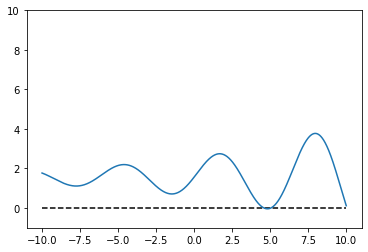

In [8]:
plt.plot([-10,10],[0,0],'k--')
plt.plot(x,function)
plt.ylim(-1,10)

In [9]:
root = secant(fofx,-2.0,debug=True)

print(root[0]+np.pi,fofx(root[0]))

DEBUG - secant: -0.009615153639454421 1.561190561842469 -0.4151591895753166 1
DEBUG - secant: -1.5738839000452476 0.7164282344422142 0.998032189436504 2
DEBUG - secant: 6.560437253080176 2.098284234918385 -0.08807474169703065 3
DEBUG - secant: 5.459730384155739 0.3045672039727265 1.9063061148775573 4
DEBUG - secant: 5.16875721038278 0.06561918060427963 1.0467191872827926 5
DEBUG - secant: 5.057240442931003 0.010235200487807017 0.5884243428474119 6
DEBUG - secant: 5.031937415849738 0.0005306426009787923 0.4045049809627461 7
DEBUG - secant: 5.030473800352094 1.7763905066914276e-06 0.3625560140848212 8
DEBUG - secant: 5.030468867696097 2.0177193249537595e-11 0.3601286016711539 9
8.17206152128589 2.0177193249537595e-11


In [10]:
trapezoid(fofx,0,root[0],debug=True)

DEBUG - trapezoid: 0.0 3.950921009767306 5.030468867696097 3.950921009767306 1
DEBUG - trapezoid: 3.950921009767306 7.822468220735331 2.5152344338480486 3.871547210968025 2
DEBUG - trapezoid: 7.822468220735331 8.13657708757138 1.2576172169240243 0.3141088668360492 3
DEBUG - trapezoid: 8.13657708757138 8.203047167433416 0.6288086084620121 0.0664700798620359 4
DEBUG - trapezoid: 8.203047167433416 8.21905359991578 0.31440430423100607 0.016006432482363664 5
DEBUG - trapezoid: 8.21905359991578 8.223018830643701 0.15720215211550304 0.0039652307279212096 6
DEBUG - trapezoid: 8.223018830643701 8.224007891786016 0.07860107605775152 0.0009890611423148954 7
DEBUG - trapezoid: 8.224007891786016 8.224255017080548 0.03930053802887576 0.0002471252945319691 8
DEBUG - trapezoid: 8.224255017080548 8.22431678966125 0.01965026901443788 6.177258070216851e-05 9
DEBUG - trapezoid: 8.22431678966125 8.224332232260096 0.00982513450721894 1.544259884589394e-05 10
DEBUG - trapezoid: 8.224332232260096 8.2243360928

(8.22433705802741, 12)

In [11]:
print(root[0])

5.030468867696097


In [12]:
main()


Starting our calculation.  Yay!


The root I have found is: 5.030468867696097 , which took 9 iterations.


Integral from 0 to  5.030468867696097 is 8.22433705802741 , which took 12 iterations.

